<a href="https://colab.research.google.com/github/dfavenfre/Food-Vision-Tensorflow/blob/main/src/notebook/food_vision_cnn_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
!pip install tensorboard --quiet
%reload_ext tensorboard

In [ ]:
#!rm -rf ./model_checkpoint/

In [ ]:
# Tensorflow Modules
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Fundamental Modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import numpy as np
import random
import datetime
import zipfile
import pathlib
import os

# A Typical Convolutional Neural Network Architecture

![picture](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*z7hd8FZeI_eodazwIapvAw.png)

| Hyperparameter / Layer Type| Description| Typical Values|
|----------------------------|------------|---------------|
|Input Image(s)|Target image(s) we'd like to discover patterns in|Any photo or video that you have would do|
|Input Layer| Takes in target images and preprocesses them for further layers|`input_shape=[batch_size, image_height, image_width, color_channels]`|
| Convolutional Layer| Extracts/Learns the most important features from the target images| Multiple, can be created with `tf.keras.layers.ConvXD` (X can be 1,2, or 3)|
| Activation Functions|Adds non-linearity to learned features | `tf.keras.activations.relu` |
| Pooling Layer|Reducses dimensionality of learned image features |Average (`tf.keras.layers.AvgPool2D`) or Max (`tf.keras.layers.MaxPool2D`) |
| Dense Layer| Further refines learned features from convolutional layers| `tf.keras.layers.Dense()`|
| Output Layer| Takes learned features and outputs them in shape of target labels| `output_shape=[number_of_classes]`|
| Output Activation function| Adds non-linearity to output layer| `tf.keras.activations.sigmoid` (for binary classification) or `tf.keras.activations.softmax` (for multi-class classification)|


**Useful Links**
- https://www.tensorflow.org/tutorials/images/cnn
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D



# Understanding the CNN Architecture


**Numeric representation of the hand-writing of number eight**
![picture](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/08/article-image-16.png)

**Filters**

Let us understand the process of convolution using a simple example. Consider that we have an image of size 3 x 3 and a filter of size 2 x 2.
The filter goes through the patches of images, performs an element-wise multiplication, and the values are summed up:

* (1x1 + 7x1 + 11x0 + 1x1) = 9
* (7x1 + 2x1 + 1x0 + 23x1) = 32
* (11x1 + 1x1 + 2x0 + 2x1) = 14
* (1x1 + 23x1 + 2x0 + 2x1) = 26

You’ll notice that the filter is considering a small portion of the image at a time. We can also imagine this as a single image broken down into smaller patches, each of which is convolved with the filter.

![picture](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/output_SbrXFP.gif)

**Pooling Layers**


The pooling operation involves sliding a two-dimensional filter over each channel of feature map and summarising the features lying within the region covered by the filter.


For a feature map having dimensions nh x nw x nc, the dimensions of output obtained after a pooling layer is:
* (n_h - f + 1) / s x (n_w - f + 1)/s x n_c
where,
* n_h - height of feature map
* n_w - width of feature map
* n_c - number of channels in the feature map
* f   - size of filter
* s   - stride length

A common CNN model architecture is to have a number of convolution and pooling layers stacked one after the other.

**Why to use Pooling Layers?**

* Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network.

* The pooling layer summarises the features present in a region of the feature map generated by a convolution layer. So, further operations are performed on summarised features instead of precisely positioned features generated by the convolution layer. This makes the model more robust to variations in the position of the features in the input image.

**Types of Pooling Layers:**

* Max Pooling:
  1. Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.
  ![picture](https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png)

* Average Pooling:
  2. Average pooling computes the average of the elements present in the region of feature map covered by the filter. Thus, while max pooling gives the most prominent feature in a particular patch of the feature map, average pooling gives the average of features present in a patch.
  ![picture](https://media.geeksforgeeks.org/wp-content/uploads/20190721030705/Screenshot-2019-07-21-at-3.05.56-AM.png)

* Global Pooling:
  3. Global pooling reduces each channel in the feature map to a single value. Thus, an nh x nw x nc feature map is reduced to 1 x 1 x nc feature map. This is equivalent to using a filter of dimensions nh x nw i.e. the dimensions of the feature map.
  Further, it can be either global max pooling or global average pooling.

**Conclusion**

In convolutional neural networks (CNNs), the pooling layer is a common type of layer that is typically added after convolutional layers. The pooling layer is used to reduce the spatial dimensions (i.e., the width and height) of the feature maps, while preserving the depth (i.e., the number of channels).

- The pooling layer works by dividing the input feature map into a set of non-overlapping regions, called pooling regions. Each pooling region is then transformed into a single output value, which represents the presence of a particular feature in that region. The most common types of pooling operations are max pooling and average pooling.
- In max pooling, the output value for each pooling region is simply the maximum value of the input values within that region. This has the effect of preserving the most salient features in each pooling region, while discarding less relevant information. Max pooling is often used in CNNs for object recognition tasks, as it helps to identify the most distinctive features of an object, such as its edges and corners.

- In average pooling, the output value for each pooling region is the average of the input values within that region. This has the effect of preserving more information than max pooling, but may also dilute the most salient features. Average pooling is often used in CNNs for tasks such as image segmentation and object detection, where a more fine-grained representation of the input is required.

Pooling layers are typically used in conjunction with convolutional layers in a CNN, with each pooling layer reducing the spatial dimensions of the feature maps, while the convolutional layers extract increasingly complex features from the input. The resulting feature maps are then passed to a fully connected layer, which performs the final classification or regression task.

**Advantages of Pooling Layer:**

1. Dimensionality reduction: The main advantage of pooling layers is that they help in reducing the spatial dimensions of the feature maps. This reduces the computational cost and also helps in avoiding overfitting by reducing the number of parameters in the model.
2.Translation invariance: Pooling layers are also useful in achieving translation invariance in the feature maps. This means that the position of an object in the image does not affect the classification result, as the same features are detected regardless of the position of the object.
3. Feature selection: Pooling layers can also help in selecting the most important features from the input, as max pooling selects the most salient features and average pooling preserves more information.

**Disadvantages of Pooling Layer:**

1. Information loss: One of the main disadvantages of pooling layers is that they discard some information from the input feature maps, which can be important for the final classification or regression task.
2. Over-smoothing: Pooling layers can also cause over-smoothing of the feature maps, which can result in the loss of some fine-grained details that are important for the final classification or regression task.
3. Hyperparameter tuning: Pooling layers also introduce hyperparameters such as the size of the pooling regions and the stride, which need to be tuned in order to achieve optimal performance. This can be time-consuming and requires some expertise in model building.




# Helper Functions

In [ ]:
def view_random_images(
    target_dir,
    target_class
    ):
  target_folder = os.path.join(target_dir, target_class)
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class + " with a shape of: " + str(img.shape))
  plt.axis("off")

  return img

def resize_images(
    file_path: str,
    img_shape: int = 224
    ):
  image = tf.io.read_file(file_path)
  image = tf.image.decode_image(image)
  image = tf.image.resize(image,
                          size=[img_shape, img_shape]
                          )
  image = tf.expand_dims(image / 255., axis=0)

  return image

def plot_predictions(
    target_dir: str,
    model
    ):
  class_labels = ["pizza", "steak"]
  target_class = random.choice(class_labels)
  target_folder = os.path.join(target_dir, target_class)

  random_image = random.choice(os.listdir(target_folder))
  image_path = os.path.join(target_folder,
                            random_image)
  resized_image = resize_images(image_path)

  prediction = model.predict(resized_image)
  prediction_object = class_labels[int(tf.round(prediction))]

  image = mpimg.imread(image_path)
  plt.imshow(image)
  plt.title(f"Predicted Object: {prediction_object}")
  plt.axis(False)
  plt.show()

# Food Vision Data

The data used for CNN modelling is [Food 101](https://www.kaggle.com/datasets/dansbecker/food-101), which is consisted of images of various foods, about 9 GB. The task is to develop a multi-class image classification model to correctly identify which food image belongs to its actual label.  

*It contains images of food, organized by type of food. It was used in the Paper "Food-101 – Mining Discriminative Components with Random Forests" by Lukas Bossard, Matthieu Guillaumin and Luc Van Gool. It's a good (large dataset) for testing computer vision techniques.*

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-10-05 06:53:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.207, 172.253.122.207, 172.253.63.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   220MB/s    in 0.5s    

2023-10-05 06:53:47 (220 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


## Exploration

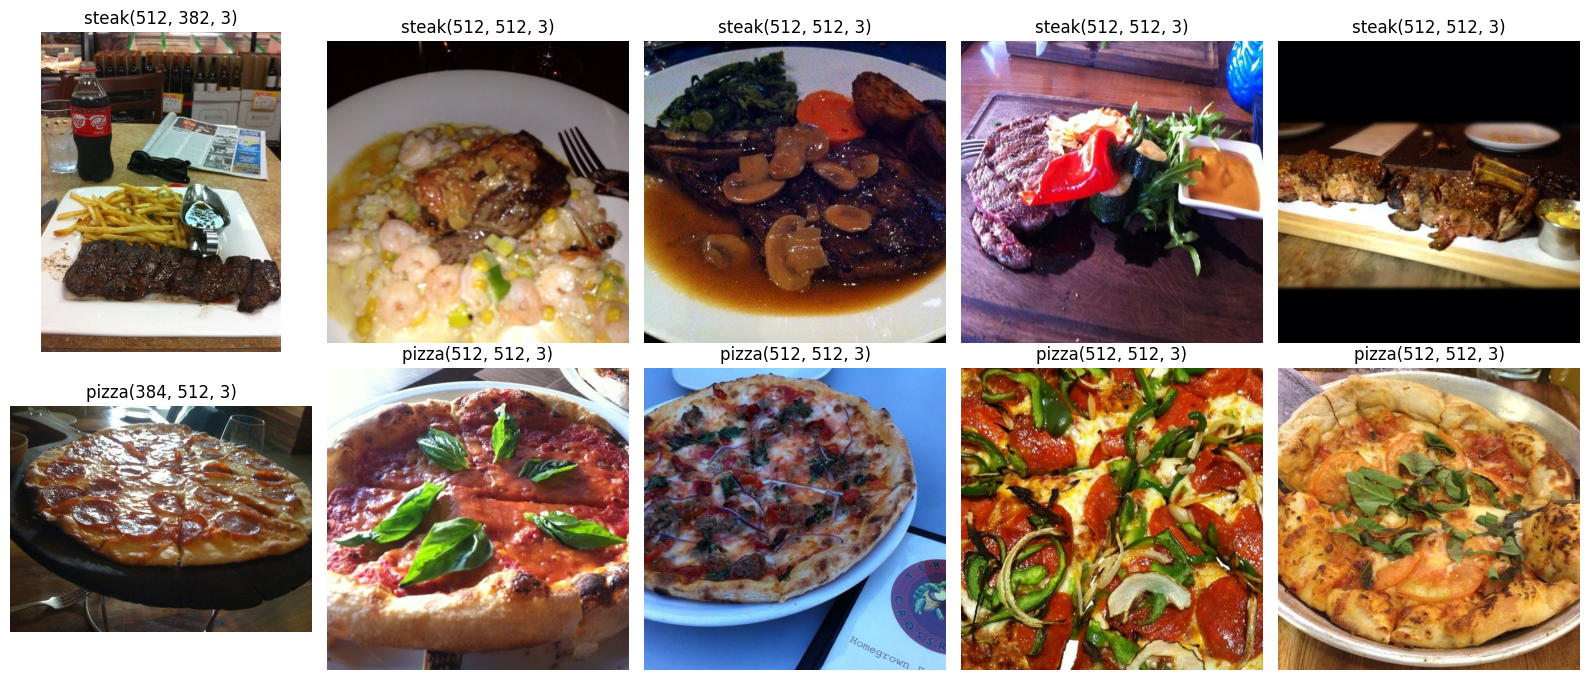

In [ ]:
class_type = ["steak", "pizza"]
num_rows = len(class_type)
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 7))

for i, food in enumerate(class_type):
    for j in range(num_cols):
        ax = axes[i, j]
        img = view_random_images(target_dir="pizza_steak/train/",
                                 target_class=food)
        ax.imshow(img)
        ax.set_title(food + str(img.shape))
        ax.axis("off")

plt.tight_layout()
plt.show()

## Preprocessing

In [ ]:
tf.random.set_seed(1212124)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
    )


train_data = train_datagen.flow_from_directory(
    directory="/content/pizza_steak/train",
    batch_size=32,
    target_size=(224,224),
    class_mode="binary",
    shuffle=False,
    seed=1212124
  )


shuffled_training_data = train_datagen.flow_from_directory(
    directory="/content/pizza_steak/train",
    batch_size=32,
    target_size=(224,224),
    class_mode="binary",
    shuffle=True,
    seed=1212124
  )

non_augmented_train_datagen = ImageDataGenerator(
    rescale=1./255
)

non_augmented_train_data = non_augmented_train_datagen.flow_from_directory(
    directory="/content/pizza_steak/train",
    batch_size=32,
    target_size=(224,224),
    class_mode="binary",
    shuffle=False,
    seed=1212124
  )


test_datagen = ImageDataGenerator(
    rescale=1./255
    )

test_data = test_datagen.flow_from_directory(
    directory="/content/pizza_steak/test",
    batch_size=32,
    target_size=(224,224),
    class_mode="binary",
    seed=1212124
  )

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
non_augmented_images, non_augmented_labels = non_augmented_train_data.next()
augmented_images, augmented_labels = train_data.next()

In [ ]:
print(f"Non-augmented Image Shape {non_augmented_images.shape}, \nAugmented Image Shape: {augmented_images.shape}")

Non-augmented Image Shape (32, 224, 224, 3), 
Augmented Image Shape: (32, 224, 224, 3)


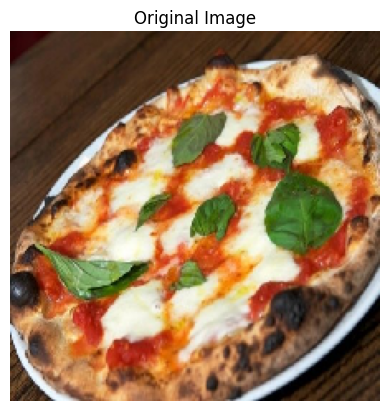

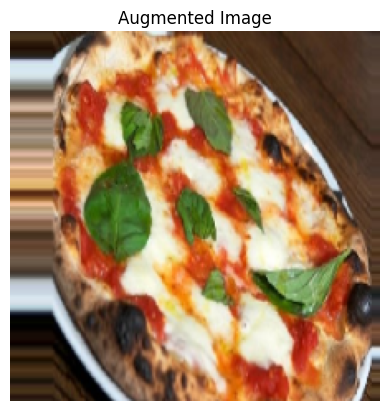

In [ ]:
random_number = random.randint(0, 32)
plt.imshow(non_augmented_images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

# Modelling

## Callbacks

In [ ]:
tf.random.set_seed(42)

# Visualize the training on Tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Save model checkpoint with best epoch
cb_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="model_checkpoint/model-{epoch:02d}-{accuracy:.3f}.hdf5",
    monitor="val_accuracy",
    mode="max",
    save_best_only=True,
    save_weights_only=True,
    verbose=0
)

# Drop the learning rate when model does not improve its performance metric
cb_reducelr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",
    mode="max",
    factor=0.1,
    patience=5,
    verbose=0,
    min_lr=1e-7
)

# Force stop the training if model does not improve for a specific number of epochs
cb_earlystop = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    mode="max",
    min_delta=0.001,
    patience=10,
    verbose=0,
)


## CNN Model Architecture

In [ ]:
class FV_101(tf.keras.Model):
  def __init__(
        self,
        filters: int,
        kernel_size: int,
        strides: int,
        activations: str,
        num_inputs: tuple[int],
        pool_size: tuple[int],
        units: int
        ):

    super(FV_101, self).__init__(name="")
    self.filters=filters
    self.kernel_size=kernel_size
    self.strides=strides
    self.activations = activations
    self.num_inputs=num_inputs
    self.pool_size=pool_size
    self.units=units

    self.conv2d_1 = tf.keras.layers.Conv2D(
        filters=self.filters,
        kernel_size=self.kernel_size,
        strides=self.strides,
        activation=self.activations,
        kernel_initializer=tf.keras.initializers.LecunNormal(seed=1212124),
        bias_initializer=tf.keras.initializers.LecunNormal(seed=1212124),
        input_shape=self.num_inputs,
        name="conv2d_1"
    )

    self.maxpool_1 = tf.keras.layers.MaxPool2D(
        pool_size=self.pool_size,
        strides=self.strides,
        padding="valid",
        name="maxpool_1"
    )


    self.conv2d_2 = tf.keras.layers.Conv2D(
        filters=self.filters,
        kernel_size=self.kernel_size,
        strides=self.strides,
        activation=self.activations,
        kernel_initializer=tf.keras.initializers.LecunNormal(seed=1212124),
        bias_initializer=tf.keras.initializers.LecunNormal(seed=1212124),
        name="conv2d_2"
    )

    self.maxpool_2 = tf.keras.layers.MaxPool2D(
        pool_size=self.pool_size,
        strides=self.strides,
        padding="valid",
        name="maxpool_2"
    )

    self.conv2d_3 = tf.keras.layers.Conv2D(
        filters=self.filters,
        kernel_size=self.kernel_size,
        strides=self.strides,
        activation=self.activations,
        kernel_initializer=tf.keras.initializers.LecunNormal(seed=1212124),
        bias_initializer=tf.keras.initializers.LecunNormal(seed=1212124),
        name="conv2d_3"
    )

    self.maxpool_3 = tf.keras.layers.MaxPool2D(
        pool_size=self.pool_size,
        strides=self.strides,
        padding="valid",
        name="maxpool_3"
    )

    self.conv2d_4 = tf.keras.layers.Conv2D(
        filters=self.filters,
        kernel_size=self.kernel_size,
        strides=self.strides,
        activation=self.activations,
        kernel_initializer=tf.keras.initializers.LecunNormal(seed=1212124),
        bias_initializer=tf.keras.initializers.LecunNormal(seed=1212124),
        name="conv2d_4"
    )

    self.maxpool_4 = tf.keras.layers.MaxPool2D(
        pool_size=self.pool_size,
        strides=self.strides,
        padding="valid",
        name="maxpool_4"
    )

    self.flat = tf.keras.layers.Flatten(name="flat_1")
    self.dns = tf.keras.layers.Dense(
        units=self.units,
        activation=self.activations,
        kernel_initializer=tf.keras.initializers.LecunNormal(seed=1212124),
        bias_initializer=tf.keras.initializers.LecunNormal(seed=1212124),
        name="dense_1"
        )
    self.outpt = tf.keras.layers.Dense(1, activation="sigmoid", name="output")


  def call(self, inputs):
      x = self.conv2d_1(inputs)
      x = self.maxpool_1(x)
      x = self.conv2d_2(x)
      x = self.maxpool_2(x)
      x = self.conv2d_3(x)
      x = self.maxpool_3(x)
      x = self.conv2d_4(x)
      x = self.maxpool_4(x)
      x = self.flat(x)
      x = self.dns(x)
      x = self.outpt(x)

      return x

## Fit the model

In [ ]:
cnn_model = FV_101(
    filters=10,
    kernel_size=3,
    strides=2,
    activations="relu",
    num_inputs=(224, 224, 3),
    pool_size=2,
    units=100
)

cnn_model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

cnn_model.fit(
    shuffled_training_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    batch_size=32,
    callbacks=[
        cb_checkpoint,
        cb_reducelr,
        cb_earlystop,
        tensorboard_callback
        ],
    verbose=1,
    validation_data=test_data,
    validation_steps=len(test_data)
    )

Epoch 1/100
47/47 [==============================] - 38s 776ms/step - loss: 0.6851 - accuracy: 0.5540 - val_loss: 0.6313 - val_accuracy: 0.7420 - lr: 0.0010
Epoch 2/100
47/47 [==============================] - 41s 878ms/step - loss: 0.5893 - accuracy: 0.6907 - val_loss: 0.4750 - val_accuracy: 0.7740 - lr: 0.0010
Epoch 3/100
47/47 [==============================] - 38s 803ms/step - loss: 0.5306 - accuracy: 0.7440 - val_loss: 0.4173 - val_accuracy: 0.8160 - lr: 0.0010
Epoch 4/100
47/47 [==============================] - 35s 744ms/step - loss: 0.4964 - accuracy: 0.7587 - val_loss: 0.3553 - val_accuracy: 0.8320 - lr: 0.0010
Epoch 5/100
47/47 [==============================] - 38s 815ms/step - loss: 0.4739 - accuracy: 0.7813 - val_loss: 0.3861 - val_accuracy: 0.8240 - lr: 0.0010
Epoch 6/100
47/47 [==============================] - 40s 798ms/step - loss: 0.4559 - accuracy: 0.7880 - val_loss: 0.3482 - val_accuracy: 0.8580 - lr: 0.0010
Epoch 7/100
47/47 [==============================] - 33s 7

In [ ]:
cnn_model.summary(
    expand_nested=True,
    show_trainable=True
    )

Model: ""
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 conv2d_12 (Conv2D)          multiple                  280       Y          
                                                                            
 conv2d_13 (Conv2D)          multiple                  910       Y          
                                                                            
 max_pooling2d_6 (MaxPoolin  multiple                  0         Y          
 g2D)                                                                       
                                                                            
 conv2d_14 (Conv2D)          multiple                  910       Y          
                                                                            
 conv2d_15 (Conv2D)          multiple                  910       Y          
                                                                  

# Evaluation

In [ ]:
# Access to tensorboard
!tensorboard dev upload --logdir ./logs/ \
  --name "Food101 Image Classification Model Training"

## Preprocessing

In [ ]:
photo_links = ["https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true"]

for photos in photo_links:
  !wget {photos}

--2023-10-05 10:00:21--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg [following]
--2023-10-05 10:00:21--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg [following]
--2023-10-05 10:00:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.gi

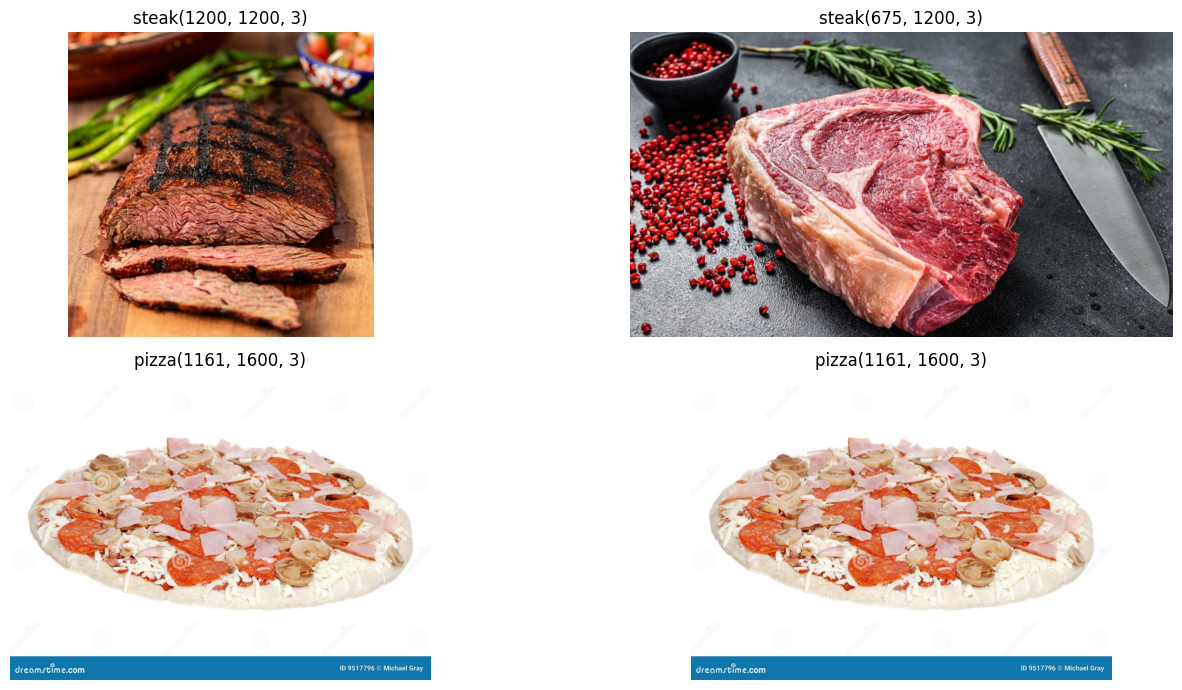

In [ ]:
class_type = ["steak", "pizza"]
num_rows = len(class_type)
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 7))

for i, food in enumerate(class_type):
    for j in range(num_cols):
        ax = axes[i, j]
        img = view_random_images(target_dir="/content/oos_image/",
                                 target_class=food)
        ax.imshow(img)
        ax.set_title(food + str(img.shape))
        ax.axis(False)

plt.tight_layout()
plt.show()

In [ ]:
class_names = ["pizza", "steak"]
base_dir = "/content/oos_image/"

image_list = []

for class_name in class_names:
    class_dir = os.path.join(base_dir, class_name)
    if os.path.exists(class_dir):
        image_files = os.listdir(class_dir)
        for image_file in image_files:
            image_path = os.path.join(class_dir, image_file)
            processed_image = resize_images(image_path)
            image_list.append(processed_image)
    else:
        print(f"Directory '{class_name}' not found.")

In [ ]:
best_cnn_model = FV_101(
    filters=10,
    kernel_size=3,
    strides=2,
    activations="relu",
    num_inputs=(224, 224, 3),
    pool_size=2,
    units=100
)
best_cnn_model(tf.zeros((1,224, 224, 3)))
best_cnn_model.load_weights("/content/model-30-0.843.hdf5")

## Predictions

In [ ]:
test_prediction = best_cnn_model.predict(image_list)
print(class_names[int(tf.round(test_prediction))])

1/1 [==============================] - 0s 39ms/step
pizza


1/1 [==============================] - 0s 18ms/step


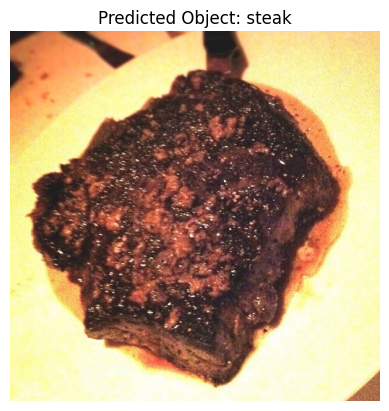

In [ ]:
plot_predictions(
    target_dir = "/content/pizza_steak/test/",
    model=best_cnn_model)

# Out of Sample Predictions

1/1 [==============================] - 0s 17ms/step


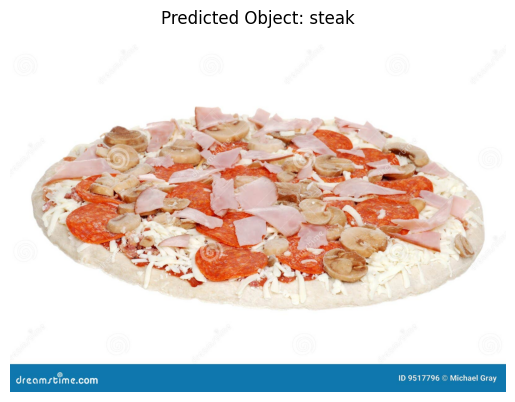

In [ ]:
plot_predictions(
    target_dir = "/content/oos_image/",
    model=best_cnn_model)